# Regression Analysis on House Pricing Dataset

This notebook consists of an analysis and prediction on Kaggle's House Pricing Dataset found through this link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques 

This notebook is subdivided into three parts:
1. Exploratory Data Analysis
2. Data Cleaning and preprocessing
3. Modelling 

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import category_encoders as ce
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor


In [2]:
house = pd.read_csv('train.csv')

In [3]:
house.shape

(1460, 81)

In [4]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
house.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#### From these initial checks, datasets contains a good mix of numerical and categorical variables, which will require data encoding in the future. The dataset also contains thousands of nulls which have to be dealt with. 

#### First, however, let's explore our target variable, 'SalePrice'

In [7]:
house['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

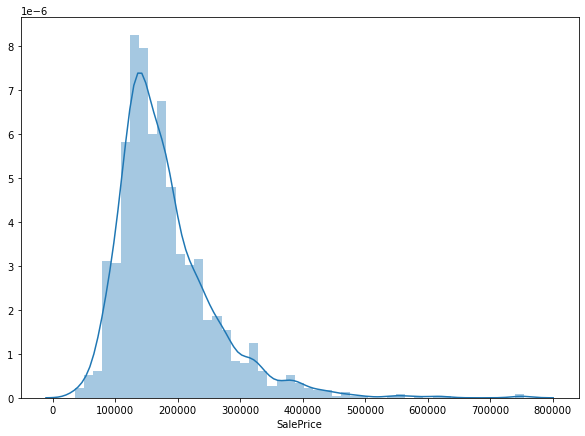

In [8]:
plt.figure(figsize=(10,7))
sns.distplot(house['SalePrice'])

In [9]:
# Our mean is greater than our median, leading me to believe that our data is positively skewed as reflected by the distplot's long right tail.
# Check for skewness

print(f"Skew : {house['SalePrice'].skew()}")

Skew : 1.8828757597682129


Knowing that there is a positive skewness to our data, we will change the individual features' skew later on and remove features with high skewness.

For now, let's explore the relationship between the target variable and other features.

In [10]:
# Getting numerical and categorical columns

num_cols = [col for col in house.columns if house.dtypes[col] != "object"]

cat_cols = [col for col in house.columns if house.dtypes[col] == "object"]

print(f"Numerical columns: {num_cols}")
print(f"\nCategorical columns: {cat_cols}")

Numerical columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Fireplac

In [11]:
num_house = house[num_cols].drop(columns="Id")
categ_house = house[cat_cols]

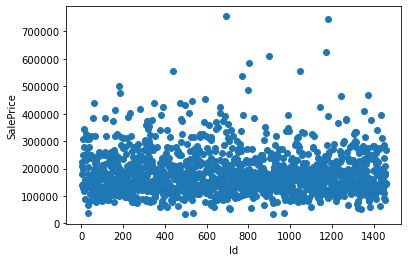

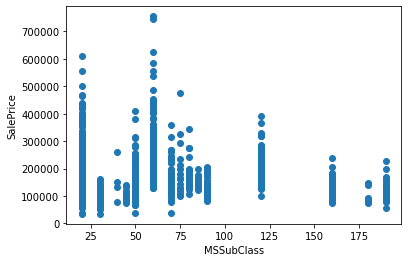

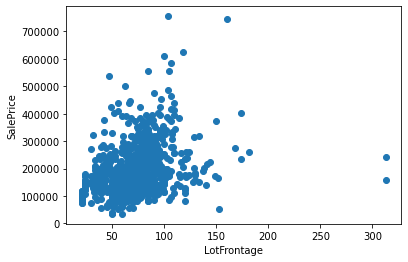

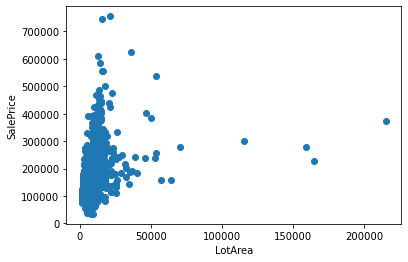

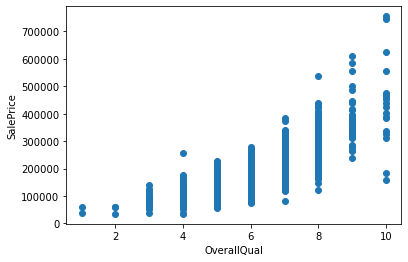

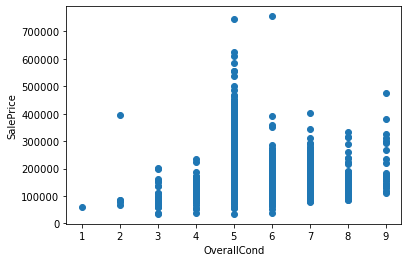

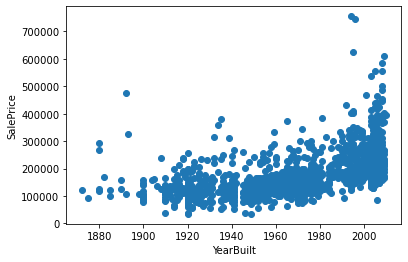

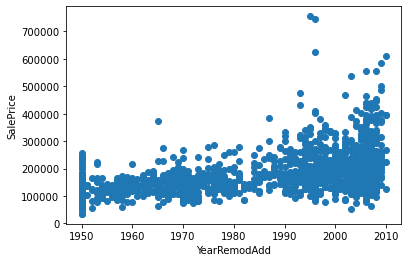

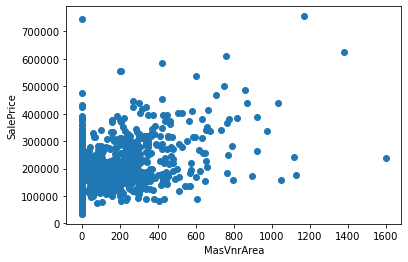

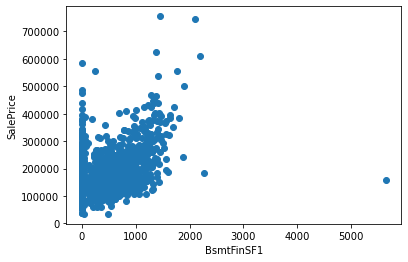

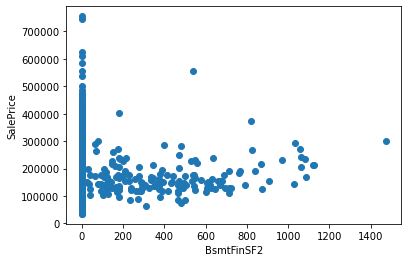

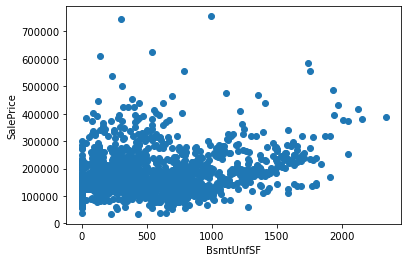

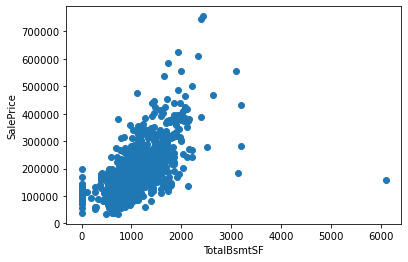

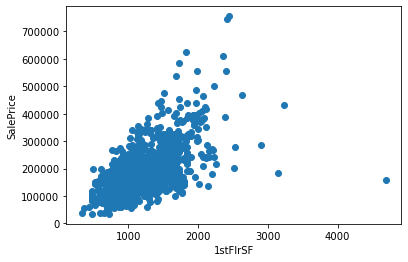

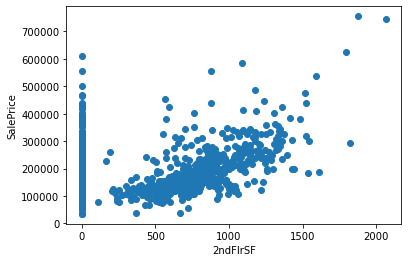

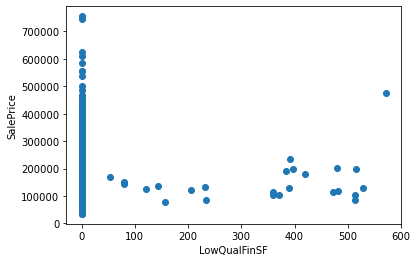

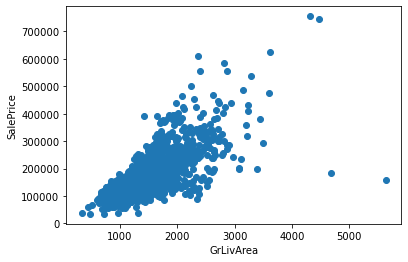

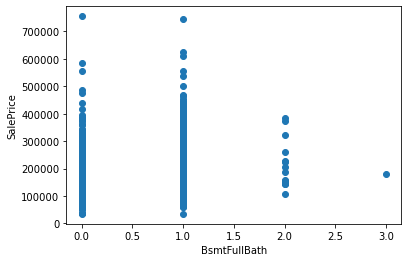

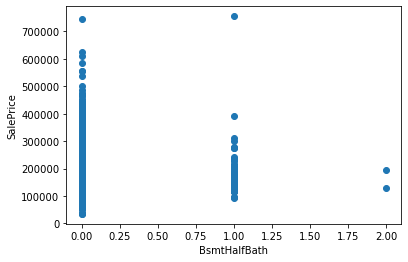

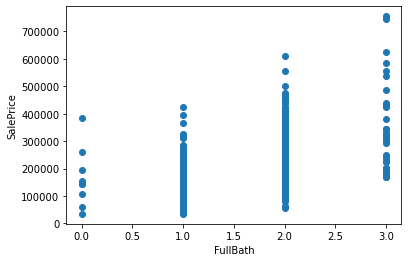

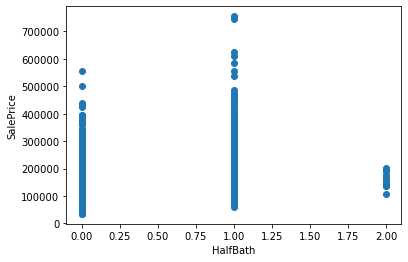

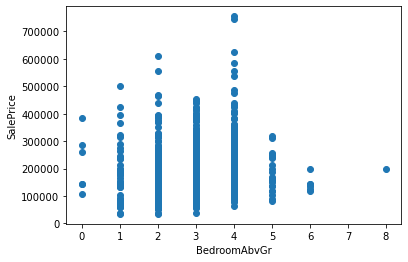

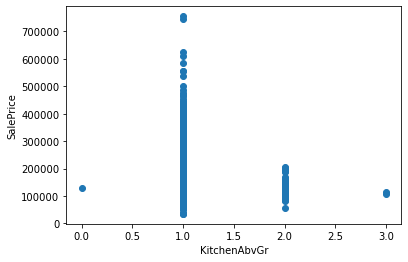

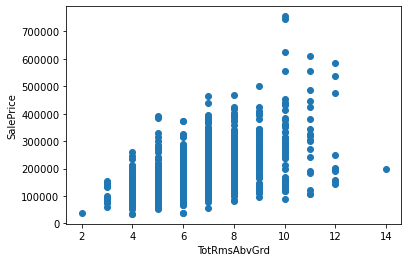

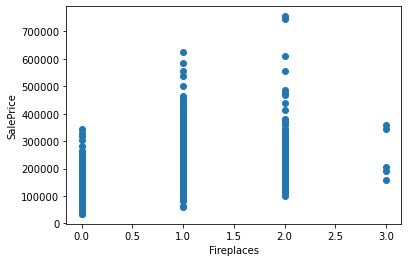

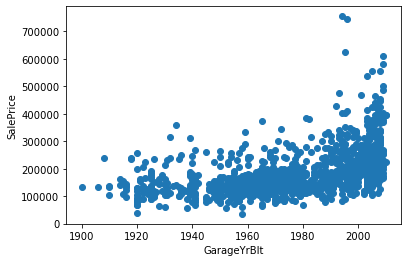

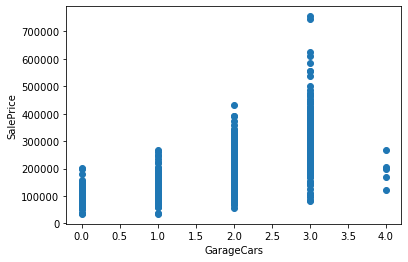

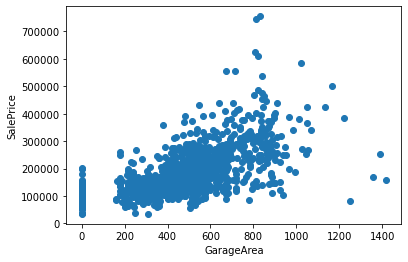

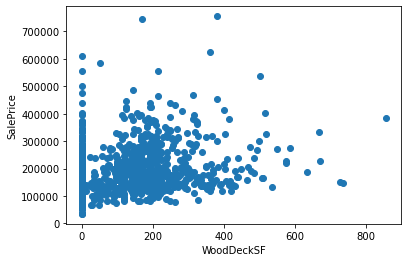

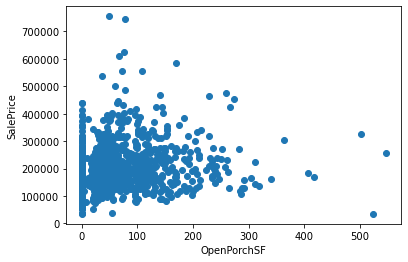

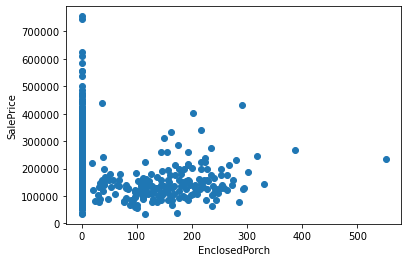

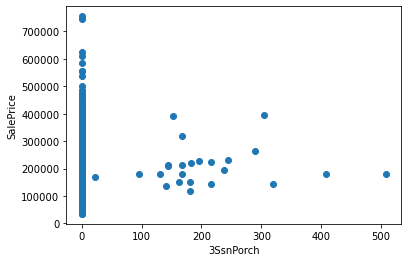

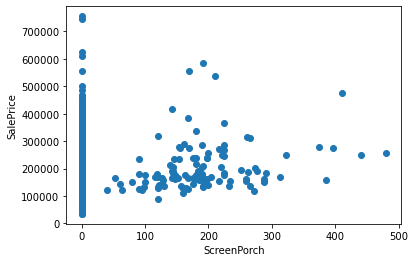

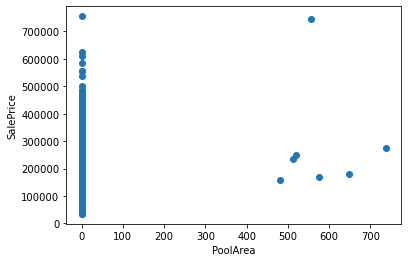

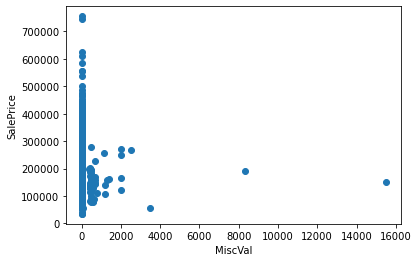

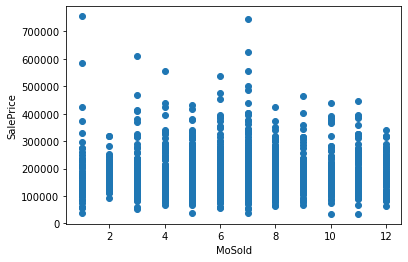

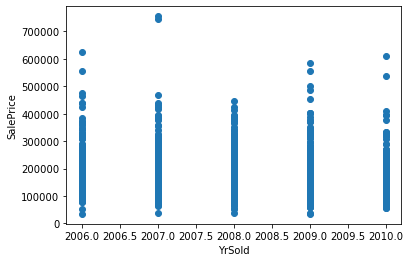

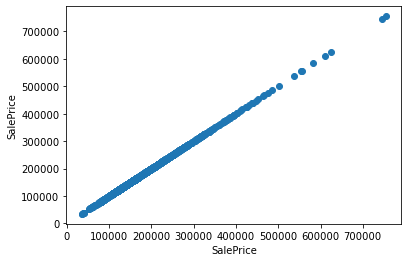

In [12]:
# Creating scatter plots to see how SalePrice is related to other variables
mpl.rcParams.update({'figure.max_open_warning': 0})
for i in num_cols:
    plt.figure()
    plt.scatter(x=house[i], y=house['SalePrice'])
    plt.xlabel(f"{i}")
    plt.ylabel("SalePrice")

#### From the results, it seems that SalePrice is correlated with GrLivArea, 1stFlrSF, OverallQual, TotalBsmtSF

#### To check these results, let's create a heatmap of the correlation between these variables

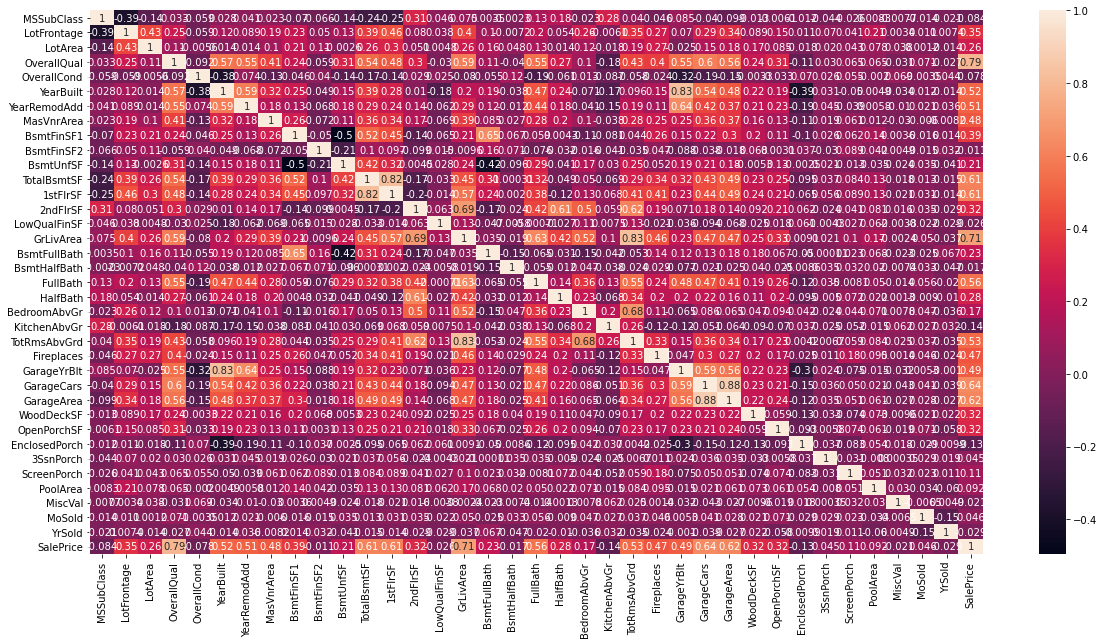

In [13]:
plt.figure(figsize = (20,10))
sns.heatmap(num_house.corr(), annot=True)

Indeed, SalePrice is strongly correlated with the features stated above as well as it being correlated with more features!

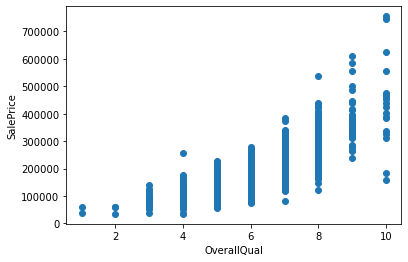

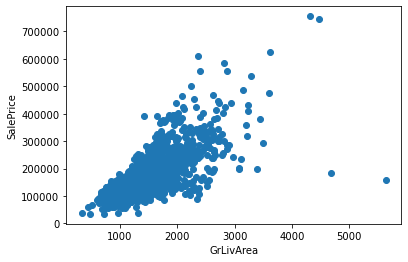

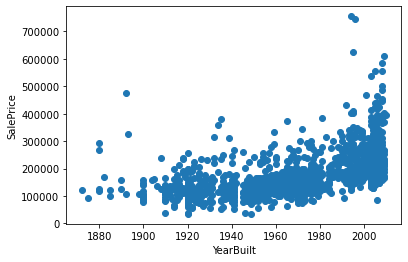

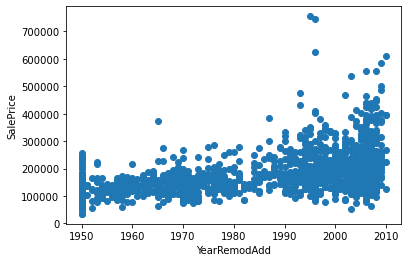

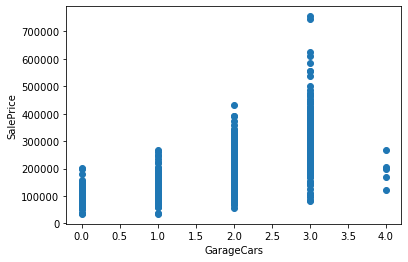

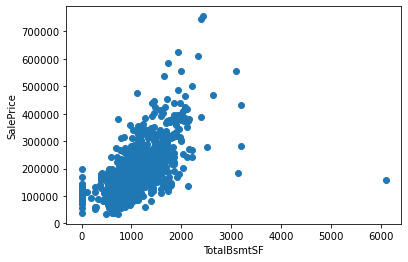

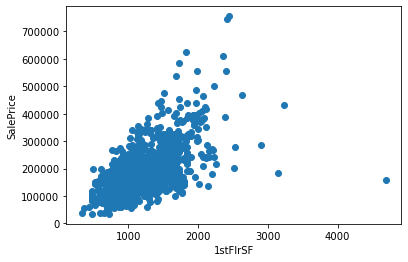

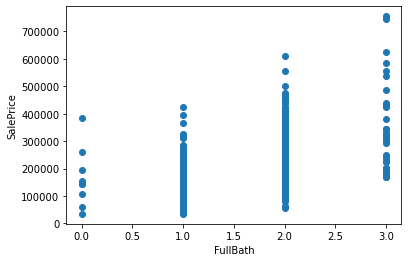

In [14]:
# Scatter plot between strongly correlated features

features = ['OverallQual', 'GrLivArea', 'YearBuilt', 'YearRemodAdd', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath']

for i in features:
    plt.figure()
    plt.scatter(x=house[i], y=house['SalePrice'])
    plt.xlabel(f"{i}")
    plt.ylabel("SalePrice")

Now that we've found the strongly correlated numerical features, let's proceed to cleaning up the rest of the dataset.

# Data Cleaning and Preprocessing

#### Alley

The null in Alley simply mean No Alley Access so let's change it to that. 

In [15]:
house['Alley'] = house['Alley'].apply(lambda x: 'No alley access' if type(x) == float else x) #Since np.nan is float

#### LotFrontage 

It means horizontal distance between the side lot lines measured along the front lot lines, where the front lot line is not a straight line or where the side lot lines are not parallel, the lot frontage is to be measured by a line parallel to the chord of the lot frontage drawn through a point therein distant from the front lot line equal to the required depth of the front yard. (https://www.lawinsider.com/dictionary/lot-frontage)

Therefore it is completely plausible that the nulls means that there is no LotFrontage for the house, not that it's non-existent

In [16]:
print(house['LotFrontage'].unique()) ### Checking if there is a value of 0.0 

# Since there is no value of zero, we can see that NaN means that there is no LotFrontage, not that it's non-existent. 

[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]


In [17]:
# Changing nan to 0

house['LotFrontage'] = house['LotFrontage'].apply(lambda x: 0.0 if pd.isnull(x) else x)

In [18]:
### Since there is no record of MasVnrType and there is already a None
### I assume that it was not recorded at all hence the need for imputation

imputer_type = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer_area = SimpleImputer(missing_values = np.nan, strategy = 'median')

house['MasVnrType'] = imputer_type.fit_transform(house[['MasVnrType']])
house['MasVnrArea'] = imputer_area.fit_transform(house[['MasVnrArea']])
house['Electrical'] = imputer_type.fit_transform(house[['Electrical']])

In [19]:
print(house['BsmtCond'].unique())
print(house['BsmtExposure'].unique())
print(house['BsmtFinType1'].unique())
print(house['BsmtFinType2'].unique())
print(house['BsmtQual'].unique())

print(house['FireplaceQu'].unique())
print(house['GarageType'].unique())
print(house['GarageFinish'].unique())
print(house['GarageQual'].unique())
print(house['GarageCond'].unique())

print(house['PoolQC'].unique())
print(house['MiscFeature'].unique())
print(house['Fence'].unique())

['TA' 'Gd' nan 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' nan]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
['Gd' 'TA' 'Ex' nan 'Fa']
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
['RFn' 'Unf' 'Fin' nan]
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
[nan 'Ex' 'Fa' 'Gd']
[nan 'Shed' 'Gar2' 'Othr' 'TenC']
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


#### Since we have a NA present in these 13 columns, we change all nans to NA

For the nan rows in column GarageYrBlt, since it refers to NoGarage, we assume that the value of the year is non-existent hence null. We can also change it to None. 

In [20]:
NA_list = ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for i in NA_list:
    house[i] = house[i].apply(lambda x: 'NA' if pd.isnull(x) else x)

In [21]:
print(house.isnull().sum()) # Only one left is YrBuilt but that is expected 

## Drop all nulls

house.dropna(inplace=True)

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0


#### Now that most of the data has been cleaned, let's do a last check on the columns specifically the MSSubClass column. It is currently an int64 type but there is an equivalent meaning to these integers, hence let us replace MSSubClass with the actual dwelling meaning to retain nominality



In [22]:
dictionary = {20:'1-STORY 1946 & NEWER ALL STYLES', 
            30:'1-STORY 1945 & OLDER', 
            40:'1-STORY W/FINISHED ATTIC ALL AGES', 
            45:'1-1/2 STORY - UNFINISHED ALL AGES',
            50:'1-1/2 STORY - UNFINISHED ALL AGES',
            60: '2-STORY 1946 & NEWER',
            70: '2-STORY 1945 & OLDER',
            75: '2-1/2 STORY ALL AGES',
            80: 'SPLIT OR MULTI-LEVEL',
            85: 'SPLIT FOYER',
            90: 'DUPLEX - ALL STYLES AND AGES',
            120: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
            150: '1-1/2 STORY PUD - ALL AGES',
            160: '2-STORY PUD - 1946 & NEWER',
            180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
            190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'
            }

house['MSSubClass'] = house['MSSubClass'].replace(dictionary)

In [23]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [24]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1379 non-null   int64  
 1   MSSubClass     1379 non-null   object 
 2   MSZoning       1379 non-null   object 
 3   LotFrontage    1379 non-null   float64
 4   LotArea        1379 non-null   int64  
 5   Street         1379 non-null   object 
 6   Alley          1379 non-null   object 
 7   LotShape       1379 non-null   object 
 8   LandContour    1379 non-null   object 
 9   Utilities      1379 non-null   object 
 10  LotConfig      1379 non-null   object 
 11  LandSlope      1379 non-null   object 
 12  Neighborhood   1379 non-null   object 
 13  Condition1     1379 non-null   object 
 14  Condition2     1379 non-null   object 
 15  BldgType       1379 non-null   object 
 16  HouseStyle     1379 non-null   object 
 17  OverallQual    1379 non-null   int64  
 18  OverallC

In [25]:
house.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

## Our data has now been cleaned!

### Encoding our categorical features

I will be using two main encoding methods, binary and pandas get_dummies. Since there is no relevant order to these categorical datasets, the use of Label/Ordinal Encoder is no longer required. The use of Binary versus get_dummies came down to the number of categories in every feature. If there are greater than 15 different categories, get_dummies was preferred over binary as binary encoder tends to leave out much of the information as distinct categories grow in size leading to the possibility of loss of valuable data. 

In [26]:
Binary = ['MSSubClass', 'Neighborhood', 'Exterior1st', 'Exterior2nd']
Get_Dummies = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition']

In [27]:
for i in Binary:
    encoder = ce.BinaryEncoder(cols = f'{i}', return_df = True)
    house = encoder.fit_transform(house)

for i in Get_Dummies:
    house[i] = pd.get_dummies(house[i], drop_first=True)

In [28]:
house.head()

,Id,MSSubClass_0,MSSubClass_1,MSSubClass_2,MSSubClass_3,MSSubClass_4,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,0,0,0,0,1,0,65.0,8450,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,7,5,2003,2003,1,1,0,0,0,0,1,0,0,0,0,1,1,196.0,0,0,0,0,0,0,0,706,0,0,150,856,1,0,1,0,856,854,0,1710,1,0,2,1,3,1,0,8,0,0,0,1,2003.0,1,2,548,0,0,0,0,61,0,0,0,0,0,0,1,0,2,2008,0,0,208500
1,2,0,0,0,1,0,0,80.0,9600,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,6,8,1976,1976,1,1,0,0,0,1,0,0,0,0,1,0,0,0.0,0,0,1,0,0,1,0,978,0,0,284,1262,1,0,1,0,1262,0,0,1262,0,1,2,0,3,1,0,6,0,1,0,1,1976.0,1,2,460,0,0,0,298,0,0,0,0,0,0,0,1,0,5,2007,0,0,181500
2,3,0,0,0,0,1,0,68.0,11250,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,7,5,2001,2002,1,1,0,0,0,0,1,0,0,0,0,1,1,162.0,0,0,0,0,0,0,0,486,0,0,434,920,1,0,1,0,920,866,0,1786,1,0,2,1,3,1,0,6,0,1,0,1,2001.0,1,2,608,0,0,0,0,42,0,0,0,0,0,0,1,0,9,2008,0,0,223500
3,4,0,0,0,1,1,0,60.0,9550,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,7,5,1915,1970,1,1,0,0,0,1,1,0,0,0,1,1,0,0.0,0,0,0,0,1,0,0,216,0,0,540,756,1,0,1,0,961,756,0,1717,1,0,1,0,3,1,0,7,0,1,0,0,1998.0,0,3,642,0,0,0,0,35,272,0,0,0,0,0,1,0,2,2006,0,0,140000
4,5,0,0,0,0,1,0,84.0,14260,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,8,5,2000,2000,1,1,0,0,0,0,1,0,0,0,0,1,1,350.0,0,0,0,0,0,0,0,655,0,0,490,1145,1,0,1,0,1145,1053,0,2198,1,0,2,1,4,1,0,9,0,1,0,1,2000.0,1,3,836,0,0,0,192,84,0,0,0,0,0,0,1,0,12,2008,0,0,250000


In [29]:
house.shape

(1379, 98)

#### Now that we've encoded our features, let us move to modelling!

The first thing we will do is scale our data to ensure that the categorical data we've encoded does not become affected by outliers such as Floor Size which can reach thousands.

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
x = house.drop(columns = ['Id', 'SalePrice'])
y = house['SalePrice']

In [32]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)

In [34]:
reg = LinearRegression()

In [35]:
reg.fit(X_train, y_train)

LinearRegression()

In [36]:
print(reg.score(X_train, y_train))
reg_CV = cross_val_score(reg, X_train, y_train)
print(reg_CV.mean())

0.8330769479613401
-7.208589009919627e+24


In [37]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

32553.329071597025

Mean squared error is extremely high, let's try other models such as GradientBoosting

In [38]:
#List of learning rates
lr_list = [0.005, 0.0075, 0.01, 0.025, 0.05,0.1,0.25,0.5,0.75, 0.80,0.85,0.9, 0.95, 1]

for lr in lr_list:
    gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=lr, random_state=0)
    gbr.fit(X_train, y_train)

    print("Learning rate: ", lr)
    print(f"Accuracy score (training): {gbr.score(X_train, y_train)}")
    print(f"Accuracy score (validation): {gbr.score(X_test, y_test)}")

Learning rate:  0.005
Accuracy score (training): 0.9481175462903333
Accuracy score (validation): 0.8890558585403031
Learning rate:  0.0075
Accuracy score (training): 0.9602349668397978
Accuracy score (validation): 0.8977868074219366
Learning rate:  0.01
Accuracy score (training): 0.966753264559351
Accuracy score (validation): 0.9002086505847755
Learning rate:  0.025
Accuracy score (training): 0.9840831386393638
Accuracy score (validation): 0.9037269749508441
Learning rate:  0.05
Accuracy score (training): 0.9940445217346096
Accuracy score (validation): 0.9009223238460757
Learning rate:  0.1
Accuracy score (training): 0.9988370443787701
Accuracy score (validation): 0.896877146771274
Learning rate:  0.25
Accuracy score (training): 0.9999782262433139
Accuracy score (validation): 0.8823164419818668
Learning rate:  0.5
Accuracy score (training): 0.9999999155678392
Accuracy score (validation): 0.8622163051956673
Learning rate:  0.75
Accuracy score (training): 0.9999999999161542
Accuracy scor

In [39]:
#List of learning rates
lr_list = [0.005, 0.0075, 0.01, 0.025, 0.05,0.1,0.25,0.5,0.75, 0.80,0.85,0.9, 0.95, 1]

for lr in lr_list:
    gbh = HistGradientBoostingRegressor(max_iter=100, learning_rate=lr, random_state=0)
    gbh.fit(X_train, y_train)

    print("Learning rate: ", lr)
    print(f"Accuracy score (training): {gbh.score(X_train, y_train)}")
    print(f"Accuracy score (validation): {gbh.score(X_test, y_test)}")


Learning rate:  0.005
Accuracy score (training): 0.5381660202892968
Accuracy score (validation): 0.5050303320383499
Learning rate:  0.0075
Accuracy score (training): 0.669661435828437
Accuracy score (validation): 0.6253624969681701
Learning rate:  0.01
Accuracy score (training): 0.7550858334216741
Accuracy score (validation): 0.7023198530267807
Learning rate:  0.025
Accuracy score (training): 0.9159215575887928
Accuracy score (validation): 0.835255748364006
Learning rate:  0.05
Accuracy score (training): 0.95515463661705
Accuracy score (validation): 0.8688572028424111
Learning rate:  0.1
Accuracy score (training): 0.9774093109691928
Accuracy score (validation): 0.8720429767734288
Learning rate:  0.25
Accuracy score (training): 0.9951870655155021
Accuracy score (validation): 0.8694796530879971
Learning rate:  0.5
Accuracy score (training): 0.9994615617229743
Accuracy score (validation): 0.8653273127100432
Learning rate:  0.75
Accuracy score (training): 0.9999552425091004
Accuracy score 

Our validation scores are highest for GBR when lr is 0.1 and for GBH when lr is 0.25.

In [40]:
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, random_state=0)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
print(f"GBR RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

gbh = HistGradientBoostingRegressor(max_iter=100, learning_rate=0.25, random_state=0)
gbh.fit(X_train, y_train)
y_pred = gbh.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)
print(f"GBH RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

GBR RMSE: 24559.646241373826
GBH RMSE: 27630.182678499037


Upon the use of other models, our RMSE is still extremely high. 

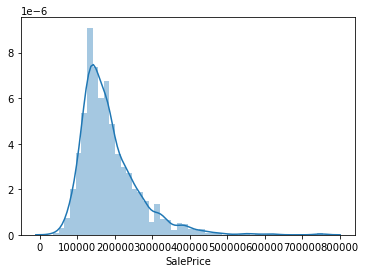

In [41]:
sns.distplot(house['SalePrice'])

### Upon re-examination of our distribution, it may me because our data has not yet been transformed into a normal distribution, one of the requirements in regression. 

Hence, in order to do this transformation, we make use of a logarithmic transformation using numpy's log1p. 

In [42]:
y = np.log1p(y)

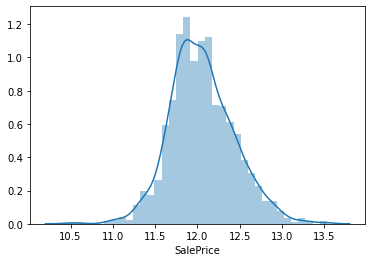

In [43]:
sns.distplot(y)

# Now we have a normal distribution, and our regression models should result in substantially lower RMSEs

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)

In [45]:
reg = LinearRegression()
reg.fit(X_train, y_train)

print(reg.score(X_train, y_train))
reg_CV = cross_val_score(reg, X_train, y_train)
print(reg_CV.mean())

y_pred = reg.predict(X_test)
print(f"Linear Regression RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

0.8767029087330769
-2.873892921764219e+24
Linear Regression RMSE: 0.11920994121918306


In [46]:
#List of learning rates
lr_list = [0.005, 0.0075, 0.01, 0.025, 0.05,0.1,0.25,0.5,0.75, 0.80,0.85,0.9, 0.95, 1]

for lr in lr_list:
    gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=lr, random_state=0)
    gbr.fit(X_train, y_train)

    print("Learning rate: ", lr)
    print(f"Accuracy score (training): {gbr.score(X_train, y_train)}")
    print(f"Accuracy score (validation): {gbr.score(X_test, y_test)}")

Learning rate:  0.005
Accuracy score (training): 0.933309112750981
Accuracy score (validation): 0.8932091083877136
Learning rate:  0.0075
Accuracy score (training): 0.9476455572427914
Accuracy score (validation): 0.9048597362894559
Learning rate:  0.01
Accuracy score (training): 0.9546042320258931
Accuracy score (validation): 0.9077350086418478
Learning rate:  0.025
Accuracy score (training): 0.978751823503834
Accuracy score (validation): 0.9113326474984005
Learning rate:  0.05
Accuracy score (training): 0.991568728712139
Accuracy score (validation): 0.9088730258863067
Learning rate:  0.1
Accuracy score (training): 0.9983935609697636
Accuracy score (validation): 0.9052274491256783
Learning rate:  0.25
Accuracy score (training): 0.9999674933659547
Accuracy score (validation): 0.8982535576978633
Learning rate:  0.5
Accuracy score (training): 0.9999999110934715
Accuracy score (validation): 0.8748931556334855
Learning rate:  0.75
Accuracy score (training): 0.9999999998415848
Accuracy score

In [47]:
#List of learning rates
lr_list = [0.005, 0.0075, 0.01, 0.025, 0.05,0.1,0.25,0.5,0.75, 0.80,0.85,0.9, 0.95, 1]

for lr in lr_list:
    gbh = HistGradientBoostingRegressor(max_iter=100, learning_rate=lr, random_state=0)
    gbh.fit(X_train, y_train)

    print("Learning rate: ", lr)
    print(f"Accuracy score (training): {gbh.score(X_train, y_train)}")
    print(f"Accuracy score (validation): {gbh.score(X_test, y_test)}")


Learning rate:  0.005
Accuracy score (training): 0.5464078609035833
Accuracy score (validation): 0.5224193587197717
Learning rate:  0.0075
Accuracy score (training): 0.6800438790548231
Accuracy score (validation): 0.6482619523941835
Learning rate:  0.01
Accuracy score (training): 0.7659242599655984
Accuracy score (validation): 0.729729779271822
Learning rate:  0.025
Accuracy score (training): 0.9288452182901082
Accuracy score (validation): 0.8768889136348201
Learning rate:  0.05
Accuracy score (training): 0.9673417397575246
Accuracy score (validation): 0.9003931070555586
Learning rate:  0.1
Accuracy score (training): 0.9866046777805806
Accuracy score (validation): 0.8959451896236811
Learning rate:  0.25
Accuracy score (training): 0.9980340386455485
Accuracy score (validation): 0.8850437256161177
Learning rate:  0.5
Accuracy score (training): 0.9997852740024814
Accuracy score (validation): 0.8581419715910792
Learning rate:  0.75
Accuracy score (training): 0.9999825047072727
Accuracy sco

In [48]:
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, random_state=0)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
print(f"GBR RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

gbh = HistGradientBoostingRegressor(max_iter=100, learning_rate=0.1, random_state=0)
gbh.fit(X_train, y_train)
y_pred = gbh.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)
print(f"GBH RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

GBR RMSE: 0.11181635378273318
GBH RMSE: 0.11948487469667145


### Our models have performed relatively the same in terms of training and validation, but our RMSE has significantly dropped because of our transformation of the target variable into a normal distribution! Our RMSE has now significantly dropped from at least 30000 to 0.11!

# Summary

In this notebook we have done data analysis and modelling of Kaggle's House Pricing Dataset. Through this notebook, we have learned the use of:

1. Exploratory Data Analysis in determining the relationship between our target variables with different features
2. Categorical Data Encoding using Binary Encoders and Python's get_dummies to transform our categorical features into numerical features that our model can understand
3. Three different regression models: Linear Regression, GradientBoostingRegressor and HistGradientBoostingRegressor
4. The importance of ensuring that the target variable follows a normal distribution during a regression analysis

# Future Projects

For future iterations of this project, the following improvements can be done:

1. The use of hyperparameter tuning for the models and the use of more models in doing the training and validation
2. For Data Cleaning and Preprocessing, the results of directly removing uncorrelated variables can be explored
3. The use of model ensembling to further decrease the root mean squared error